## COVID-19 Post Vaccination Infection Data and Analysis in California

"The California Department of Public Health (CDPH) is identifying vaccination status of COVID-19 cases, hospitalizations, and deaths by analyzing the state immunization registry and registry of confirmed COVID-19 cases. Post-vaccination cases are individuals who have a positive SARS-Cov-2 molecular test (e.g. PCR) at least 14 days after they have completed their primary vaccination series or 14 days after they have completed their booster or additional dose."

All data and data definition in this notebook are downloaded and referred from [California Open Data Portal](https://data.ca.gov/dataset/covid-19-post-vaccination-infection-data)

In this notebook, we want to answer some questions:
- What are the trends of vaccination status in California?
- Among those who are not vaccinated, how many % were infected and how many % were hospitalized?
- What are the trends of COVID cases?
- What are the trends of COVID hospitalization?

In [10]:
# install libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150
mpl.rc('font',**{'size':13})

In [2]:
# load dataframe
url = "https://data.chhs.ca.gov/dataset/e39edc8e-9db1-40a7-9e87-89169401c3f5/resource/c5978614-6a23-450b-b637-171252052214/download/covid19postvaxstatewidestats.csv"
df = pd.read_csv(url)
df.head()

,date,area,area_type,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,...,population_boosted,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,boosted_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,boosted_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k,boosted_deaths_per_100k
0,2021-02-01,California,State,13804,22,0,792,0,0,12,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-02,California,State,11352,17,0,633,0,0,15,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03,California,State,10328,26,0,567,0,0,17,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-04,California,State,9003,17,0,498,0,0,19,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-05,California,State,8396,17,0,511,0,0,27,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# understand columns
# list of columns
df.columns

Index(['date', 'area', 'area_type', 'unvaccinated_cases', 'vaccinated_cases',
       'boosted_cases', 'unvaccinated_hosp', 'vaccinated_hosp', 'boosted_hosp',
       'unvaccinated_deaths', 'vaccinated_deaths', 'boosted_deaths',
       'population_unvaccinated', 'population_vaccinated',
       'population_boosted', 'unvaccinated_cases_per_100k',
       'vaccinated_cases_per_100k', 'boosted_cases_per_100k',
       'unvaccinated_hosp_per_100k', 'vaccinated_hosp_per_100k',
       'boosted_hosp_per_100k', 'unvaccinated_deaths_per_100k',
       'vaccinated_deaths_per_100k', 'boosted_deaths_per_100k'],
      dtype='object')

In [8]:
# load data dictionary from the source in order to understand the columns
data_dict_url = "https://data.chhs.ca.gov/dataset/e39edc8e-9db1-40a7-9e87-89169401c3f5/resource/0c33ce39-a523-43b6-9fb3-a5bfe25d0cc6/download/postvax_odp_data-dictionary_12p_booster.xlsx"
data_dict = pd.read_excel(data_dict_url, skiprows=1)
data_dict

,COLUMN_NAME,FORMAT,DEFINITION
0,DATE,Date,Reporting time period\n\nValues:\nDate in YYY-...
1,AREA,Plain text,"State of Residence\n\nValue: \n""California"""
2,AREA_TYPE,Plain text,Geographic type of the Area field.\n\nValues: ...
3,UNVACCINATED_CASES,Numeric,Total number of laboratory-confirmed COVID-19 ...
4,VACCINATED_CASES,Numeric,Total number of laboratory-confirmed COVID-19 ...
5,BOOSTED_CASES,Numeric,Total number of laboratory-confirmed COVID-19 ...
6,UNVACCINATED_DEATHS,Numeric,Total number of laboratory-confirmed COVID-19 ...
7,VACCINATED_DEATHS,Numeric,Total number of laboratory-confirmed COVID-19 ...
8,BOOSTED_DEATHS,Numeric,Total number of laboratory-confirmed COVID-19 ...
9,UNVACCINATED_HOSP,Numeric,Total number of hospitalized laboratory-confir...


Below are important definitions:
- UNVACCINATED_CASES: Total number of laboratory-confirmed COVID-19 cases among persons age 12+ with episode date on the provided date with no record of any doses of COVID-19 vaccine. Persons considered partially vaccinated are not included in the unvaccinated cases.
- VACCINATED_CASES: Total number of laboratory-confirmed COVID-19 cases among persons age 12+ with episode date on the provided date with a complete primary COVID-19 vaccine series (episode date ≥14 days after the 2nd dose of a two-dose series or ≥14 days after a single-dose vaccine). Persons considered partially vaccinated are not included in the vaccinated cases.
- BOOSTED_CASES: Total number of laboratory-confirmed COVID-19 cases among persons age 12+ with episode date on the provided date with a complete COVID-19 vaccine series and additional or booster dose (episode date ≥14 days after the additional or booster dose). 
- POPULATION_UNVACCINATED: Number of persons age 12+ with a complete primary COVID-19 vaccine series based on information in the California Immunization Registry. This number only includes those persons considered  vaccinated defined as ≥14 days after the 2nd dose of a two-dose series or ≥14 days after a single-dose vaccine. 
- POPULATION_VACCINATED: Number of persons age 12+ that are with a complete COVID-19 vaccine series and additional or booster dose based on information in the California Immunization Registry. This number only includes those persons considered having received an additional or booster dose  ≥14 days after the additional or booster dose. 


So basically:
- UNVACCINATED_CASES: People who are NOT fully vaccinated and are confirmed to have COVID-19
- VACCINATED_CASES: People who are fully vaccinated and are confirmed to have COVID-19
- BOOSTED_CASES: People who are fully vaccinated and had additional or booster dose, and are confirmed to have COVID-19

Similar definitions apply to "_DEATHS" for COVID-19 related deaths and "_HOSP" for COVID-19 related hospitalizations. 

In [9]:
# remove unnecessary columns
# we know that this is California statewide data, so we don't need area or area_type
# we also don't need to normalize the number by 100k residents because we don't have other states or county data that we compare to
to_drop = ['area', 'area_type','unvaccinated_cases_per_100k',
       'vaccinated_cases_per_100k', 'boosted_cases_per_100k',
       'unvaccinated_hosp_per_100k', 'vaccinated_hosp_per_100k',
       'boosted_hosp_per_100k', 'unvaccinated_deaths_per_100k',
       'vaccinated_deaths_per_100k', 'boosted_deaths_per_100k']
df = df.drop(columns=to_drop)

In [13]:
# check null values
df.isna().sum()

date                       0
unvaccinated_cases         0
vaccinated_cases           0
boosted_cases              0
unvaccinated_hosp          0
vaccinated_hosp            0
boosted_hosp               0
unvaccinated_deaths        0
vaccinated_deaths          0
boosted_deaths             0
population_unvaccinated    0
population_vaccinated      0
population_boosted         0
dtype: int64

In [14]:
# data is clean, ready for statistical exploration
df.describe()

,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,vaccinated_deaths,boosted_deaths,population_unvaccinated,population_vaccinated,population_boosted
count,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,3.570000e+02,3.570000e+02,3.570000e+02
mean,5552.871148,3740.896359,903.498599,272.733894,65.07563,8.997199,44.638655,8.151261,0.610644,1.327109e+07,1.622336e+07,1.563477e+06
std,8690.525805,9465.363219,3022.649704,188.301603,88.85016,26.846892,29.421214,8.947699,1.910115,8.123912e+06,7.529373e+06,2.975283e+06
min,481.000000,6.000000,0.000000,47.000000,0.00000,0.000000,2.000000,0.000000,0.000000,4.950144e+06,3.391810e+05,0.000000e+00
25%,1684.000000,77.000000,0.000000,120.000000,7.00000,0.000000,18.000000,0.000000,0.000000,7.054967e+06,1.144265e+07,0.000000e+00
50%,2918.000000,1171.000000,0.000000,221.000000,49.00000,0.000000,43.000000,6.000000,0.000000,1.031592e+07,1.937609e+07,0.000000e+00
75%,5341.000000,2106.000000,27.000000,383.000000,84.00000,2.000000,61.000000,14.000000,0.000000,1.693970e+07,2.216304e+07,1.348838e+06
max,52890.000000,58638.000000,15882.000000,792.000000,448.00000,151.000000,131.000000,45.000000,13.000000,3.263055e+07,2.371471e+07,1.115074e+07


### First impressions

- Mean of vaccinated cases is nearly 1.5 times smaller than mean of unvaccinated cases.
- Mean of vaccinated hospitalizations is more than 2 times smaller than mean of unvaccinated hospitalizations.
- Mean of vaccinated deaths is more than 3 times smaller than mean of unvaccinated deaths.

It seems like vaccination status has some relationships with number of cases, hospitalization and deaths

## Trends in each variables in 2021-2022

How has each variable (case, hospitalizations, deaths) transitioned?

In [8]:
# function to visualize variables in a line chart
def line_chart(df,x_var,list_of_vars,title):
    '''Function that takes in a dataframe and visualize its variables on a multiple-line line chart.
    Input: a dataframe, an x variable, a list of y variables
    Output: a line chart with multiple lines. Each line is a y variable.'''

    fig, ax = plt.subplots()

    x = df[x_var]
    for var in list_of_vars:
        y = df[var]
        _ = ax.plot(x,y, label = var)
    
    ax.set_title(title)
    ax.set_xlabel(x_var)
    ax.set_ylabel("Number of people")
    ax.legend()
    plt.show()


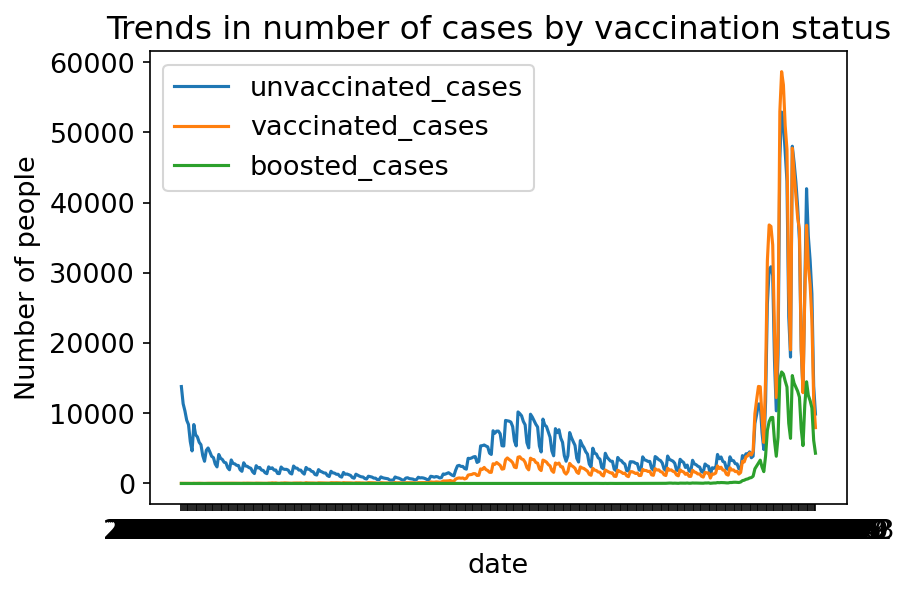

In [11]:
cases_variables = ["unvaccinated_cases","vaccinated_cases","boosted_cases"]
line_chart(df,"date",cases_variables, "Trends in number of cases by vaccination status")

### Comments

- It is surprising to see there are some points in this past year (2021-2022) when number of vaccinated cases were higher than number of unvaccinated cases. I assume that it is the Omicron variant.
- Up until recently, however, number of vaccinated cases have always been lower than unvaccinated cases.
- Boosted people couldn't escape the pike either.
- The unsmooth shape of the line is probably due to the data being recorded in the system at a certain day of week. It would be interesting to see this by month.

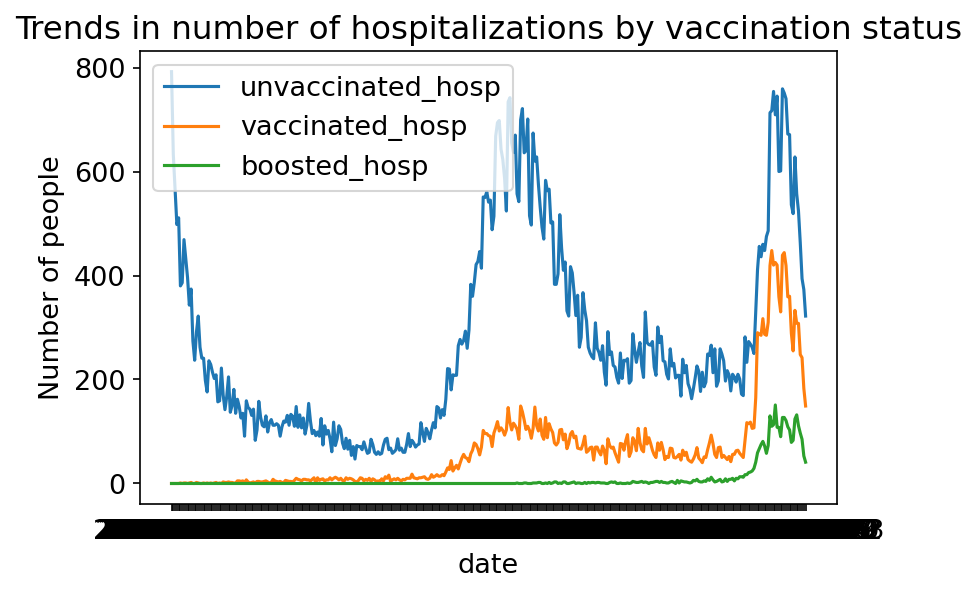

In [12]:
# what about hospitalizations
hosp_variables = ['unvaccinated_hosp', 'vaccinated_hosp', 'boosted_hosp']
line_chart(df,"date",hosp_variables, "Trends in number of hospitalizations by vaccination status")

### Comments
- The trend of hospitalizations didn't follow the same trend as the number of cases.
- Unvaccinated hospitalizations have always been higher than the vaccinated and boosted hospitalizations.
- Hospitalizations were high during Delta and Omicron variant's pikes.

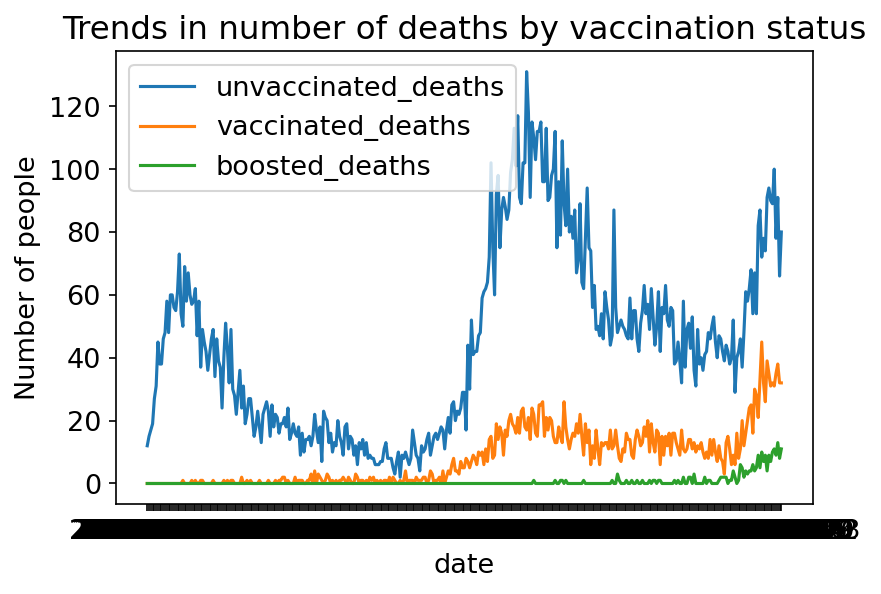

In [13]:
# what about deaths
deaths_var = ['unvaccinated_deaths', 'vaccinated_deaths', 'boosted_deaths']
line_chart(df,"date",deaths_var, "Trends in number of deaths by vaccination status")

### Comments
- Number of deaths follow similar patterns as number of hospitalizations: pikes during Delta and Omicron variant, and unvaccinated ones were higher than vaccinated or boosted ones.

In [16]:
# Let's look at the trend by month-year since we couldn't really tell the date from the line chart

# create month-year column
import datetime
df["month_year"] = pd.to_datetime(df["date"]).dt.to_period("M")

In [22]:
df.head()

,date,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,vaccinated_deaths,boosted_deaths,population_unvaccinated,population_vaccinated,population_boosted,month_year
0,2021-02-01,13804,22,0,792,0,0,12,0,0,32630546,339181,0,2021-02
1,2021-02-02,11352,17,0,633,0,0,15,0,0,32514013,373379,0,2021-02
2,2021-02-03,10328,26,0,567,0,0,17,0,0,32378982,409999,0,2021-02
3,2021-02-04,9003,17,0,498,0,0,19,0,0,32215342,431636,0,2021-02
4,2021-02-05,8396,17,0,511,0,0,27,0,0,32052084,447592,0,2021-02


In [17]:
df_monthyear = df.groupby("month_year").sum().reset_index()
df_monthyear["month_year"] = df_monthyear["month_year"].astype(str)
df_monthyear.head()

,month_year,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,vaccinated_deaths,boosted_deaths,...,population_boosted,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,boosted_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,boosted_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k,boosted_deaths_per_100k
0,2021-02,152274,566,0,9430,16,0,1342,3,0,...,0,363.035752,51.904518,0.0,22.836780,1.540015,0.0,3.670050,0.111676,0.0
1,2021-03,66818,1369,0,4279,96,0,1140,11,0,...,0,254.641565,34.846355,0.0,16.590100,2.350763,0.0,4.592839,0.319388,0.0
2,2021-04,50405,2200,0,3369,181,0,554,15,0,...,0,252.055999,25.416388,0.0,16.645175,2.057756,0.0,2.862163,0.169935,0.0
3,2021-05,27817,2470,0,2263,233,0,449,36,0,...,0,202.186492,18.544904,0.0,15.897193,1.691548,0.0,3.079769,0.246517,0.0
4,2021-06,24434,4623,0,2511,315,0,253,26,0,...,0,186.613024,19.972048,0.0,19.541962,1.520898,0.0,2.092989,0.136721,0.0


In [26]:
# function to visualize variables in a line chart
def bar_chart(df,x_var,list_of_vars,title):
    '''Function that takes in a dataframe and visualize its variables on a bar chart.
    Input: a dataframe, an x variable, a list of y variables and the title of the chart.
    Output: a bar chart with multiple bars. Each bar is a y variable.'''

    df.plot(kind="bar",x=x_var,y=list_of_vars)
    plt.xlabel(x_var)
    plt.ylabel("Number of people")
    plt.title(title)
    plt.xticks(rotation = 90)
    
    plt.show()

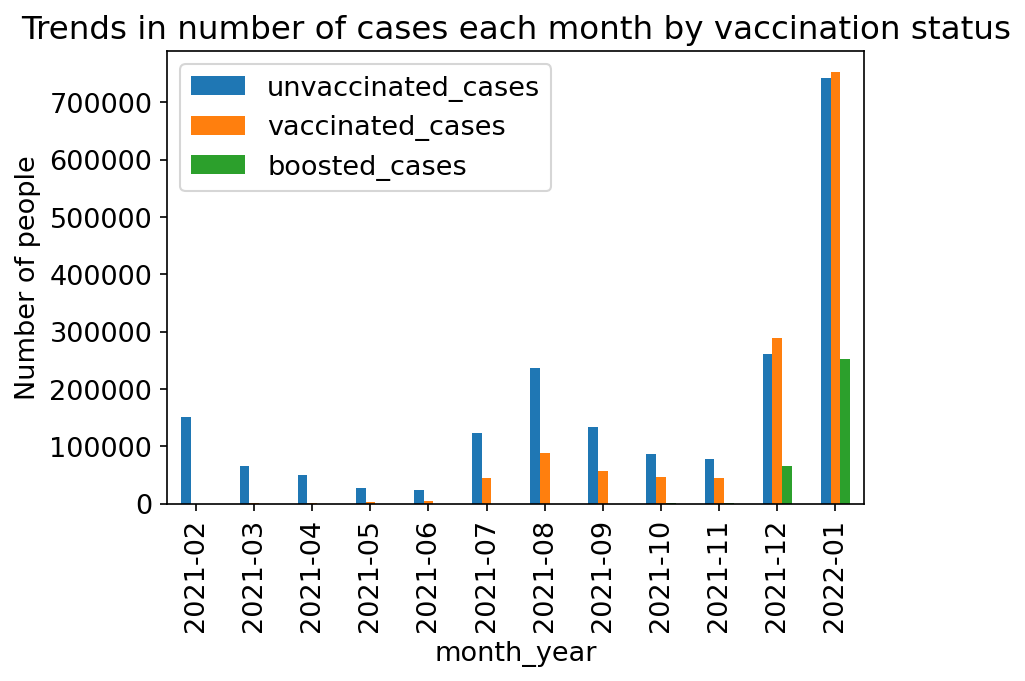

In [27]:
bar_chart(df_monthyear,"month_year",cases_variables,"Trends in number of cases each month by vaccination status")

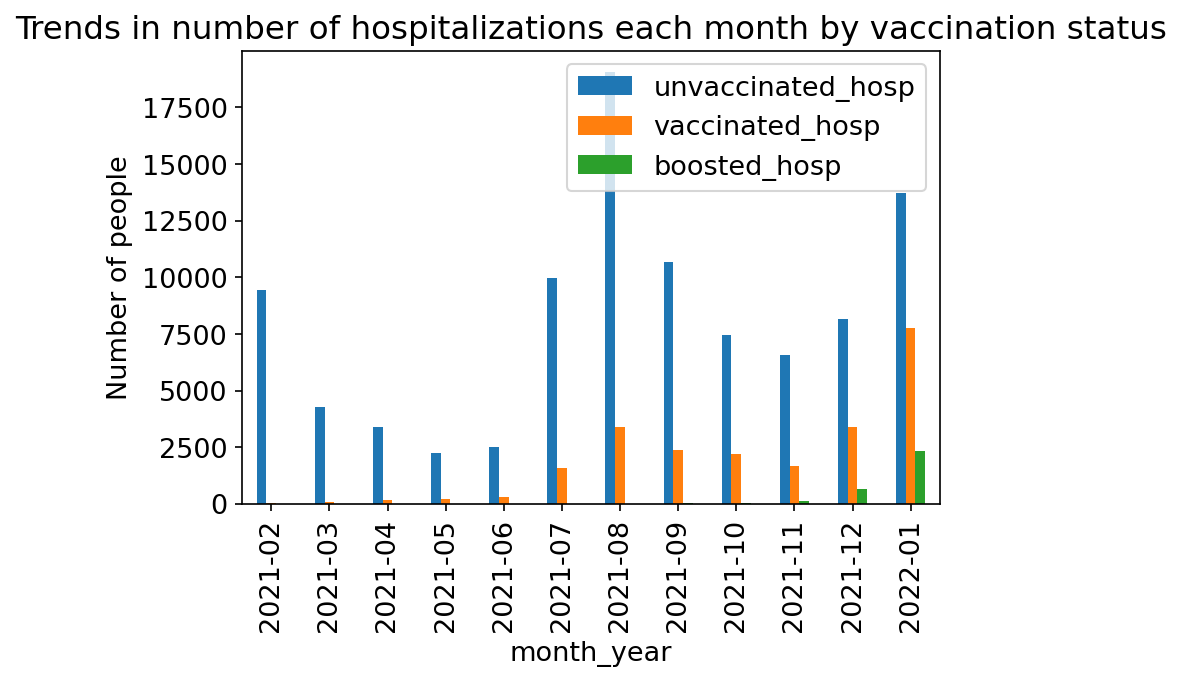

In [28]:
bar_chart(df_monthyear,"month_year",hosp_variables,"Trends in number of hospitalizations each month by vaccination status")

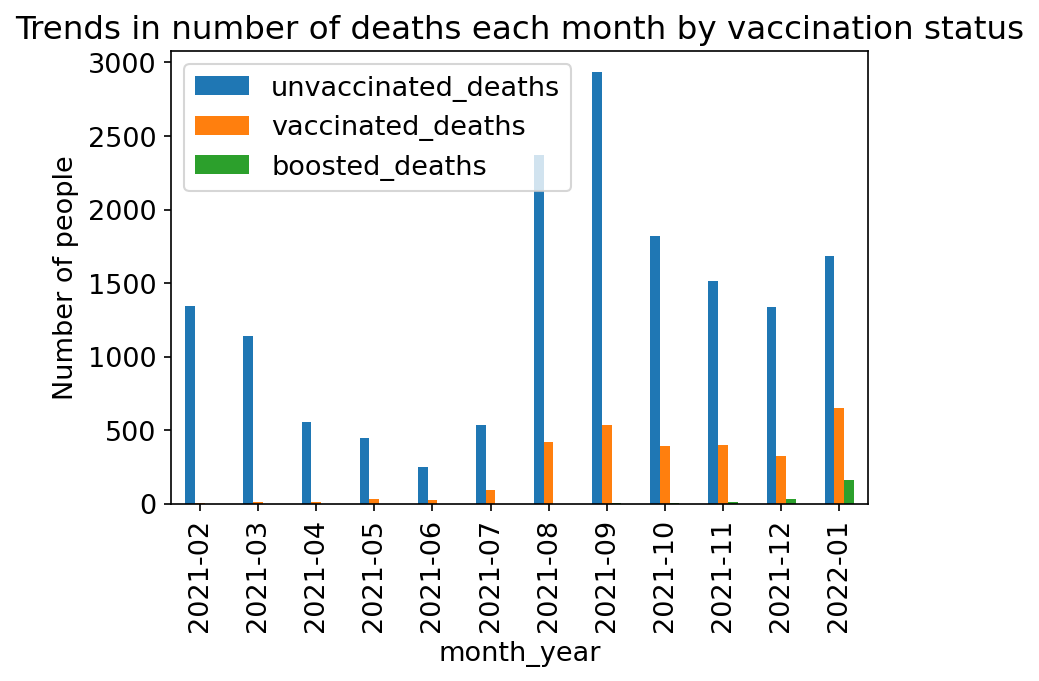

In [29]:
bar_chart(df_monthyear,"month_year",deaths_var,"Trends in number of deaths each month by vaccination status")

## Comments

The bar charts confirmed the trends that were observed in the line charts. Which are:
- Number of cases rose during Delta and Omicron's pikes.
- Cases with unvaccinated status were higher than vaccinated and boosted status in general, except for Jan and Feb 2022.
- Number of unvaccinated hospitalizations and deaths were always higher than vaccinated or boosted status.

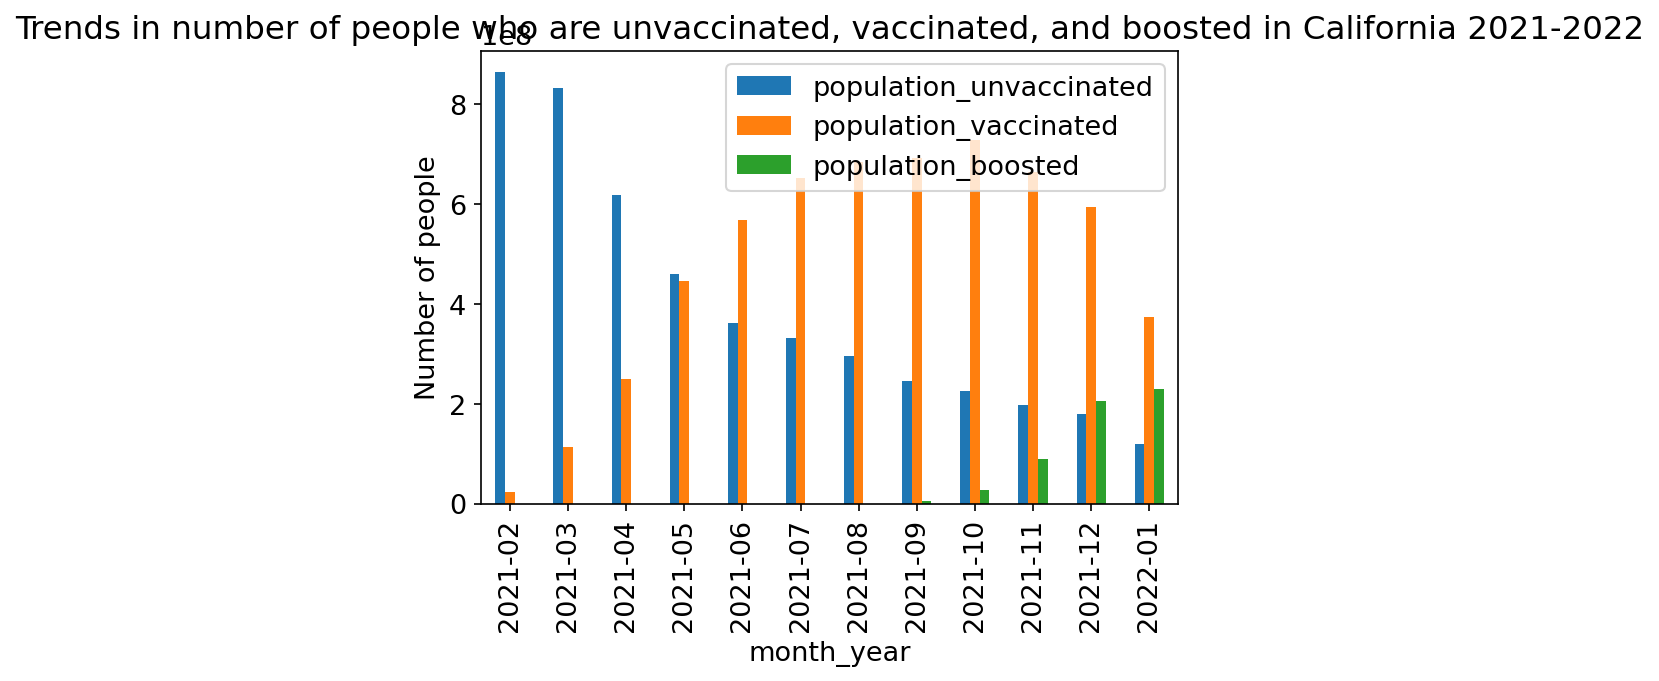

In [30]:
# What about trends in number of unvaccinated, vacinated, and boosted population in California
pop_var = ['population_unvaccinated','population_vaccinated','population_boosted']
bar_chart(df_monthyear,"month_year",pop_var,"Trends in number of people who are unvaccinated, vaccinated, and boosted in California 2021-2022")